# Percolation - Theory and Applications
Student: _Guglielmo Grillo_  
Course: _Multi-scale methods in soft matter physics [145889]_ held by _R. Potestio_  
Exam Date: _February 14, 2023_


In [1]:
L = 25 # Size of cluster. It can handle up to 50 but it becomes too slow

In [2]:
# For the presentation
# https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display

In [3]:
import numpy as np
class Square_Lattice:
    def __init__(self, L=20, uniform_coupling=False):
        self.uniform_coupling = uniform_coupling
        
        self.L = L # Lattice side. number of edges in a direction is L-1 
        if self.uniform_coupling:
            self.__edges_x__ = np.random.uniform(low=0.0, high=1.0, size=(L-1, L) )
            self.__edges_y__ = np.random.uniform(low=0.0, high=1.0, size=(L, L-1) )

        self.percolate(0)
        
    def percolate(self, p):
        if self.uniform_coupling:
            self.x_edges = self.__edges_x__ < p
            self.y_edges = self.__edges_y__ < p
        else:
            self.x_edges = np.random.uniform(low=0.0, high=1.0, size=(L-1, L) ) < p
            self.y_edges = np.random.uniform(low=0.0, high=1.0, size=(L, L-1) ) < p
        
        return (self.x_edges, self.y_edges)
    
    
    def __neighrest_neighbour_cluster__(self, cluster_idx, x, y):
        """
            This function checks for an edge between the given vertex and its nn.
            If a vertex is found, the same cluster index is assigned to the nn vertex
            and the search is continued (deep-first search).
            NB: if the new vertex as already a cluster the assignment is skipped.
                This is not a problem thanks to the deep-first search.
        """
        
        # Check the point above (NORTH)
        if(y<self.y_edges.shape[1] and y<self.__clusters__.shape[1]-1 and # Check that we are not at the border at north
            self.y_edges[x][y] and  # The edge between this point and the one above is open
            self.__clusters__[x][y+1] == 0): # And the other point is not already in a cluster
            
            self.__clusters__[x][y+1] = cluster_idx
            self.__neighrest_neighbour_cluster__(cluster_idx, x, y+1) # continue searching
        
        
        # Check the point below (SOUTH)
        if(y>0 and # Border south
            self.y_edges[x][y-1] and  # The edge between the point below and this one is open
            self.__clusters__[x][y-1] == 0): # not in a cluster
            
            self.__clusters__[x][y-1] = cluster_idx
            self.__neighrest_neighbour_cluster__(cluster_idx, x, y-1) # DFS
            
        
        # Check the point on the left (WEST)        
        if(x>0 and 
            self.x_edges[x-1][y] and  
            self.__clusters__[x-1][y] == 0):
            
            self.__clusters__[x-1][y] = cluster_idx         
            self.__neighrest_neighbour_cluster__(cluster_idx, x-1, y)

            
        # Check the point on the right (EAST)
        if(x < self.x_edges.shape[0] and x<self.__clusters__.shape[0]-1 and
            self.x_edges[x][y] and
            self.__clusters__[x+1][y] == 0):
            
            self.__clusters__[x+1][y] = cluster_idx
            self.__neighrest_neighbour_cluster__(cluster_idx, x+1, y)
           
        
    
    def get_clusters(self):
        cluster_idx = 0
        self.__clusters__ = np.zeros((self.L, self.L), dtype=int)
        
        for y in range(self.__clusters__.shape[1]):
            for x in range(self.__clusters__.shape[0]):
                
                # Only update if the point doesn't already belong to a cluster
                if self.__clusters__[x][y] == 0:
                    cluster_idx+=1
                    self.__clusters__[x][y] = cluster_idx
                    
                    self.__neighrest_neighbour_cluster__(cluster_idx, x, y)
        
        return self.__clusters__
    
# Define the two clusters
be_lattice = Square_Lattice(L=L, uniform_coupling=False)
uc_lattice = Square_Lattice(L=L, uniform_coupling=True)

In [4]:
# Plotting utils
from matplotlib import pyplot as plt
from matplotlib.colors import BASE_COLORS, CSS4_COLORS

colors = ['b', 'g', 'k', 'r', 'c', 'm', 'y', 'w'] # list(mcolors.CSS4_COLORS.values()) 

def plot_edge(x, y, ax, direction, cluster_id=0, alpha=1):
    color = colors[cluster_id % len(colors)]
    
    if direction == 'x':
        #ax.annotate(str(cluster_id), (x+1.1, y+0.1))
        x = [x, x+1]
        y = [y, y]    
    else:
        #ax.annotate(str(cluster_id), (x+0.1, y+1.1))
        x = [x, x]
        y = [y, y+1]

    ax.plot(x, y, lw=2, color=color, marker='.', alpha=alpha)
    
    
def plot_lattice(lattice, ax, show_clusters=True, alpha=1):
    clusters = lattice.get_clusters()
    
    for x in range(lattice.x_edges.shape[0]):
        for y in range(lattice.x_edges.shape[1]):
            if(lattice.x_edges[x][y]):
                plot_edge(x=x, y=y, ax=ax, cluster_id=clusters[x][y] if show_clusters else 2, direction='x')
        
    for x in range(lattice.y_edges.shape[0]):
        for y in range(lattice.y_edges.shape[1]):
            if(lattice.y_edges[x][y]):
                plot_edge(x=x, y=y, ax=ax, cluster_id=clusters[x][y] if show_clusters else 2, direction='y')

## Bernoulli Percolation

In [5]:
@widgets.interact(p=(0, 1, 0.1))
def what_is_percolation(nodes=False, edges=False, p=0, clusters=False):
    global p_old
    
    if not 'p_old' in globals():
        p_old = p
        be_lattice.percolate(p)
        
    if p_old != p:
        be_lattice.percolate(p)
        p_old = p

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
    fig.patch.set_facecolor('xkcd:mint green')

    ax.axis('off')
    ax.set_xlim(-0.5, L-0.5)
    ax.set_ylim(-0.5, L-0.5)

    if nodes:
        for y in range(L):
            for x in range(L):
                ax.plot(x, y, marker='.', color='k')
    if edges:
        for y in range(-1, L):
            for x in range(-1, L):
                ax.plot( (x, x+1), (y, y), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                ax.plot( (x, x), (y, y+1), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
        
    plot_lattice(be_lattice, ax, show_clusters=clusters)


    plt.tight_layout()
    plt.show()

interactive(children=(Checkbox(value=False, description='nodes'), Checkbox(value=False, description='edges'), …

##  Bernoulli Percolation vs Uniform Coupling

In [6]:
@widgets.interact(p=(0, 1, 0.1))
def show_differences(p=0):
    be_lattice.percolate(p)
    uc_lattice.percolate(p)


    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    fig.patch.set_facecolor('xkcd:mint green')

    line = plt.Line2D((.5, .5), (0, 1), color="gray", linewidth=2, linestyle="--")
    fig.add_artist(line)

    for ax in axs:
        ax.axis('off')
        ax.set_xlim(-0.5, L-0.5)
        ax.set_ylim(-0.5, L-0.5)

    axs[0].set_title('Bernoulli')
    axs[1].set_title('Uniform Coupling')

    plot_lattice(be_lattice, axs[0])
    plot_lattice(uc_lattice, axs[1])


    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

## Infinite Path

In [7]:
def exists_infinite_path(clusters):
    L = clusters.shape[0]
    origin_cluster = clusters[L//2][L//2]
    
    # If the origin percolates we should find a point in the
    # border which has the same cluster
    for cluster_id in clusters[:][L-1]: # North
        if cluster_id == origin_cluster: return True
    
    for cluster_id in clusters[:][0]: # South
        if cluster_id == origin_cluster: return True
    
    for cluster_id in clusters[0][:]: # West
        if cluster_id == origin_cluster: return True
    
    for cluster_id in clusters[L-1][:]: # East
        if cluster_id == origin_cluster: return True
    
    return False

In [8]:
@widgets.interact(p=(0, 1, 0.01), max_trials=(0, 10000, 100))
def what_is_percolation(p=0, max_trials=0):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
    fig.patch.set_facecolor('xkcd:mint green')
    ax.axis('off')
    ax.set_xlim(-0.5, L-0.5)
    ax.set_ylim(-0.5, L-0.5)


    be_lattice.percolate(p)
    clusters = be_lattice.get_clusters()

    count = 0
    while(not exists_infinite_path(clusters) and count < max_trials):
        count+=1
        be_lattice.percolate(p)
        
    if count >= max_trials:
        print("Maximum number of iterations reached. No infinite path found.")
        return
    
    origin_cluster = clusters[L//2][L//2]
    for x in range(be_lattice.x_edges.shape[0]):
        for y in range(be_lattice.x_edges.shape[1]):
            if(be_lattice.x_edges[x][y]):
                plot_edge(x=x, y=y, ax=ax, cluster_id=clusters[x][y], direction='x', alpha= 1 if clusters[x][y]==origin_cluster else 0.05)
        
    for x in range(be_lattice.y_edges.shape[0]):
        for y in range(be_lattice.y_edges.shape[1]):
            if(be_lattice.y_edges[x][y]):
                plot_edge(x=x, y=y, ax=ax, cluster_id=clusters[x][y], direction='y', alpha= 1 if clusters[x][y]==origin_cluster else 0.05)

    ax.plot(L//2, L//2, marker="*", markersize=20)

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

## Foliation

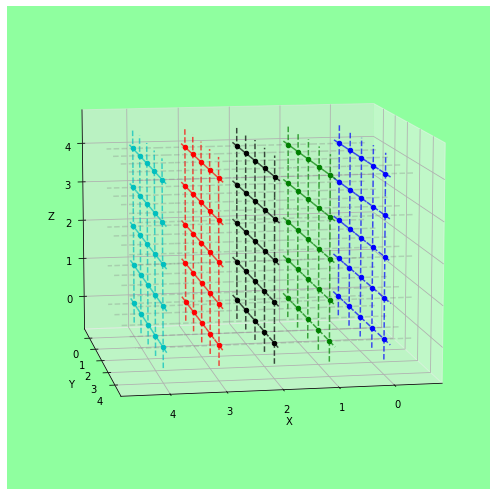

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

ax.patch.set_facecolor('xkcd:mint green')

for x in range(5):
    for y in range(5):
        for z in range(5):
            ax.scatter(x, y, z, marker='o', color=colors[x % len(colors)])
            ax.plot([x, x], [y, y], [z-0.5, z+0.5], linestyle="--", color=colors[x % len(colors)], alpha=0.7)
            ax.plot([x, x], [y-0.5, y+0.5], [z, z], linestyle="--", color=colors[x % len(colors)], alpha=0.7)
            ax.plot([x-0.5, x+0.5], [y, y], [z, z], linestyle="--", color='grey', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, 80)

ax.set_xticks(range(5))
ax.set_yticks(range(5))
ax.set_zticks(range(5))
ax.grid('off')

plt.tight_layout()
plt.show()

## Dual graph

In [10]:
L_dual = 10
be_lattice_for_dual = Square_Lattice(L=L_dual, uniform_coupling=False)
be_lattice_for_dual.percolate(0);

In [11]:
def plot_dual_lattice(lattice, ax, alpha=1):  
    for x in range(lattice.x_edges.shape[0]):
        for y in range(lattice.x_edges.shape[1]):
            if(not lattice.x_edges[x][y]):
                # horizontal edge missing, draw its perpendicular
                plot_edge(x=x+0.5, y=y-0.5, ax=ax, cluster_id=0, direction='y')
        
    for x in range(lattice.y_edges.shape[0]):
        for y in range(lattice.y_edges.shape[1]):
            if(not lattice.y_edges[x][y]):
                # vertical edge missing, draw its perpendicular
                plot_edge(x=x-0.5, y=y+0.5, ax=ax, cluster_id=0, direction='x')

In [12]:
@widgets.interact(p=(0, 1, 0.1))
def what_is_percolation(nodes=False, edges=False, dual_node=False, dual_edges=False, p=0):
    global p_old_dual
    
    if not 'p_old_dual' in globals():
        p_old_dual = p
        be_lattice_for_dual.percolate(p)
        
    if p_old_dual != p:
        be_lattice_for_dual.percolate(p)
        p_old_dual = p

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.patch.set_facecolor('xkcd:mint green')
    
    line_sx = plt.Line2D((.34, .34), (0, 1), color="gray", linewidth=2, linestyle="--")
    line_dx = plt.Line2D((.663, .663), (0, 1), color="gray", linewidth=2, linestyle="--")
    fig.add_artist(line_sx)
    fig.add_artist(line_dx)

    for ax in axs:
        ax.axis('off')
        ax.set_xlim(-0.5, L_dual-0.5)
        ax.set_ylim(-0.5, L_dual-0.5)
        
    axs[0].set_title('Both')
    axs[1].set_title('Direct Graph')
    axs[2].set_title('Dual Graph')

    if nodes:
        for y in range(L_dual):
            for x in range(L_dual):
                axs[0].plot(x, y, marker='.', color='k')
                axs[1].plot(x, y, marker='.', color='k')
    if edges:
        for y in range(L_dual):
            for x in range(L_dual):
                axs[0].plot( (x, x+1), (y, y), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                axs[0].plot( (x, x), (y, y+1), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                
                axs[1].plot( (x, x+1), (y, y), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                axs[1].plot( (x, x), (y, y+1), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
        
    if dual_node:
        for y in range(L_dual-1):
            for x in range(L_dual-1):
                axs[0].plot(x+0.5, y+0.5, marker='D', markersize=3, color='b')
                axs[2].plot(x+0.5, y+0.5, marker='D', markersize=3, color='b')

    if dual_edges:
        for y in range(-1, L_dual-1):
            for x in range(-1, L_dual-1):
                axs[0].plot( (x+0.5, x+1.5), (y+0.5, y+0.5), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                axs[0].plot( (x+0.5, x+0.5), (y+0.5, y+1.5), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                
                axs[2].plot( (x, x+1.5), (y+0.5, y+0.5), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
                axs[2].plot( (x+0.5, x+0.5), (y+0.5, y+1.5), marker='', lw='0.5', color='gray', alpha=0.5, linestyle='--')
    
    plot_lattice(be_lattice_for_dual, axs[0], show_clusters=False)
    plot_lattice(be_lattice_for_dual, axs[1], show_clusters=False)

    if p>0:
        plot_dual_lattice(be_lattice_for_dual, axs[0])
        plot_dual_lattice(be_lattice_for_dual, axs[2])
    

    plt.tight_layout()
    plt.show()

interactive(children=(Checkbox(value=False, description='nodes'), Checkbox(value=False, description='edges'), …

## Monte Carlo percolation

In [13]:
import numpy as np
class MC_Square_Lattice:
    def __init__(self, L=20):
        self.L = L # Lattice side. number of edges in a direction is L-1 
        
        self.__edges_x__ = np.zeros((L-1, L), dtype='?')
        self.__edges_y__ = np.zeros((L, L-1), dtype='?')
            
        
    def open_random_edge(self):
        edge_opened = False
        
        while(not edge_opened):
            # Get random direction
            direction = np.random.choice(a=[False, True])
        
            if direction:
                # Get random coordinates
                x = np.random.randint(low=0, high=self.__edges_x__.shape[0], dtype=int)
                y = np.random.randint(low=0, high=self.__edges_x__.shape[1], dtype=int)
                
                # If the edge is closed then open it
                if not self.__edges_x__[x][y]:
                    self.__edges_x__[x][y] = True
                    edge_opened = True
            else:
                # Same
                x = np.random.randint(low=0, high=self.__edges_y__.shape[0], dtype=int)
                y = np.random.randint(low=0, high=self.__edges_y__.shape[1], dtype=int)
                
                if not self.__edges_y__[x][y]:
                    self.__edges_y__[x][y] = True
                    edge_opened = True
        
        return (self.__edges_x__, self.__edges_y__)
    
    
    def __neighrest_neighbour_cluster__(self, x, y):
        #if x == self.L-1 or x == 0 or y == self.L-1 or y==0:
        #    print(x, y)
        #    return True
        
        # Check the point above (NORTH)
        if(y<self.__edges_y__.shape[1] and self.__edges_y__[x][y] and not self.__clusters__[x][y+1]):
            self.__clusters__[x][y+1] = True
            
            if y == self.L-2: return True
            elif self.__neighrest_neighbour_cluster__(x, y+1):
                return True
        
        
        # Check the point below (SOUTH)
        if(self.__edges_y__[x][y-1] and not self.__clusters__[x][y-1]):
            self.__clusters__[x][y-1] = True
            
            if y == 1: return True
            elif self.__neighrest_neighbour_cluster__(x, y-1):
                return True
            
        
        # Check the point on the left (WEST)        
        if(self.__edges_x__[x-1][y] and not self.__clusters__[x-1][y]):
            self.__clusters__[x-1][y] = True

            if x==1: return True
            elif self.__neighrest_neighbour_cluster__(x-1, y):
                return True

            
        # Check the point on the right (EAST)
        if(x<self.__edges_x__.shape[0] and self.__edges_x__[x][y] and not self.__clusters__[x+1][y]):
            self.__clusters__[x+1][y] = True
            
            if x== self.L-2: return True
            elif self.__neighrest_neighbour_cluster__(x+1, y):
                return True
        
        return False
        
    
    def is_percolating(self):
        self.__clusters__ = np.zeros((self.L, self.L), dtype='?')
        
        # The origin belongs to the cluster of the origin
        self.__clusters__[self.L//2][self.L//2] = True
        
        return self.__neighrest_neighbour_cluster__(self.L//2, self.L//2)
    
    def get_probability(self):
        number_of_open_edges = np.sum(self.__edges_x__) + np.sum(self.__edges_y__)
        number_of_total_edges = self.__edges_x__.shape[0] * self.__edges_x__.shape[1] + \
                                self.__edges_y__.shape[0] * self.__edges_y__.shape[1]
        return number_of_open_edges/number_of_total_edges

In [14]:
from tqdm.notebook import trange, tqdm
# https://rstudio-pubs-static.s3.amazonaws.com/241232_eebe419a0aaa4eb89398ee2a61ad3dc2.html

def monete_carlo_run(L):
    mc_sl = MC_Square_Lattice(L)
    
    while(not mc_sl.is_percolating()):
        mc_sl.open_random_edge()
    
    return mc_sl.get_probability()

@widgets.interact_manual(n_runs=[10, 100, 1000], L=(10, 100, 10))
def pc_graph(n_runs=10, L=10):
    n_bins = 100
    n_runs = int(n_runs)
    theta_esteems = np.zeros(n_bins)
    pc_esteems = np.zeros(n_bins)
    x = np.linspace(0, 1, n_bins)
    
    pc = 0
    pc2 = 0 #square for confidence interval

    for i in tqdm(range(n_runs)):
        pc_esteem = monete_carlo_run(L=L)
        bin_ = int(pc_esteem*n_bins)
        theta_esteems[bin_:]+=1
        pc_esteems[bin_]+=1
        
        pc +=pc_esteem
        pc2 += pc_esteem**2

    theta_esteems /= n_runs
    pc = pc/n_runs
    std = np.sqrt(pc2/n_runs - pc**2)
    sigma = 1.96*std/np.sqrt(n_runs)
    significant_figures = int(-1*np.log10(sigma)+1)
    
    sigma = np.round(sigma, significant_figures)
    pc = np.round(pc, significant_figures)
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), height_ratios=[3, 1])
    fig.patch.set_facecolor('xkcd:mint green')
    axs[0].set_xlabel(r"p"); axs[1].set_xlabel(r"p")
    axs[0].set_ylabel(r"$\theta(p)$"); axs[1].set_ylabel(r"$p_c$ counts")
    axs[0].set_xticks([tick/10 for tick in range(10)]); axs[0].set_yticks([tick/10 for tick in range(10)])
    axs[0].grid('on'); axs[1].grid('on')
    
    # Plot verical line corresponding to esteem of pc
    axs[0].axvspan(pc-sigma, pc+sigma, alpha=0.1, color='r')
    axs[0].vlines(x=pc, ymin=0, ymax=1, color='r', linestyle="--", label=f"$p_c\simeq {pc} \pm {sigma}$", alpha=0.7)
        
    axs[1].vlines(x=pc, ymin=0, ymax=max(pc_esteems), color='r', linestyle="--", label=f"$p_c\simeq$ {pc}", alpha=0.5)
    axs[1].axvspan(pc-sigma, pc+sigma, alpha=0.1, color='r')
    
    # Plot theta(p)
    axs[0].plot(x, theta_esteems, marker='.', label=r"$\theta(p)$")
    axs[1].plot(x, pc_esteems, marker='.', label=r"$p_c$ counts")
    
    axs[0].set_xlim([0, 1])
    axs[0].legend(loc='upper left')
    axs[1].legend(loc='upper left')
    
    plt.show()

interactive(children=(Dropdown(description='n_runs', options=(10, 100, 1000), value=10), IntSlider(value=10, d…